In [1]:
import cv2
import glob
import numpy as np
import pandas as pd
import pickle
import tensorflow as tf
from PIL import Image
import os

In [2]:
data=[]
labels=[]

height = 32
width = 32
channels = 3
classes = 43
n_inputs = height * width*channels

for i in range(classes) :
    path = "train/{0}/".format(i)
    print(path)
    Class=os.listdir(path)
    for a in Class:
        try:
            image=cv2.imread(path+a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print(" ")
            
trainx=np.array(data)
trainy=np.array(labels)

#Randomize the order of the input images
s=np.arange(trainx.shape[0])
np.random.seed(43)
np.random.shuffle(s)
trainx=trainx[s]
trainy=trainy[s]

train/0/
train/1/
train/2/
train/3/
train/4/
train/5/
train/6/
train/7/
train/8/
train/9/
train/10/
train/11/
train/12/
train/13/
train/14/
train/15/
train/16/
train/17/
train/18/
train/19/
train/20/
train/21/
train/22/
train/23/
train/24/
train/25/
train/26/
train/27/
train/28/
train/29/
train/30/
train/31/
train/32/
train/33/
train/34/
train/35/
train/36/
train/37/
train/38/
train/39/
train/40/
train/41/
train/42/


In [3]:
trainx.shape

(39209, 32, 32, 3)

In [4]:
#Spliting my Datasets for Validation into 80-20 ratio and normalizing them
(X_train,X_val)=trainx[(int)(0.2*len(trainy)):],trainx[:(int)(0.2*len(trainy))]
X_train=X_train.astype('float32')/255
x_val=X_val.astype('float32')/255
(y_train,y_val)=trainy[(int)(0.2*len(trainy)):],trainy[:(int)(0.2*len(trainy))]


In [5]:
#Converting it into one hot encoding
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train,43)
y_val=to_categorical(y_val,43)

In [6]:
n_train=X_train.shape[0]
n_validation=X_val.shape[0]
image_shape=X_train[0].shape
print("There are {} training examples ".format(n_train))
print("There are {} validation examples".format(n_validation))
print("Image data shape is {}".format(image_shape))



There are 31368 training examples 
There are 7841 validation examples
Image data shape is (32, 32, 3)


In [7]:
#Creating the CNN Model
from tensorflow.keras import datasets,layers,models
model=models.Sequential()
model.add(layers.Conv2D(filters=32,kernel_size=(5,5),activation='relu',input_shape=X_train.shape[1:]))
model.add(layers.Conv2D(filters=32,kernel_size=(5,5),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(43,activation='softmax'))

          


In [8]:
#Compile the Model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [9]:
epochs=9
history=model.fit(X_train,y_train,batch_size=32,epochs=epochs,validation_data=(X_val,y_val))


Train on 31368 samples, validate on 7841 samples
Epoch 1/9
31368/31368 [==============================] - 89s 3ms/sample - loss: 1.2239 - accuracy: 0.6520 - val_loss: 7.3732 - val_accuracy: 0.9461
Epoch 2/9
31368/31368 [==============================] - 90s 3ms/sample - loss: 0.2669 - accuracy: 0.9175 - val_loss: 5.7584 - val_accuracy: 0.9559
Epoch 3/9
31368/31368 [==============================] - 90s 3ms/sample - loss: 0.1686 - accuracy: 0.9483 - val_loss: 4.7527 - val_accuracy: 0.9674
Epoch 4/9
31368/31368 [==============================] - 91s 3ms/sample - loss: 0.1284 - accuracy: 0.9605 - val_loss: 6.1150 - val_accuracy: 0.9587
Epoch 5/9
31368/31368 [==============================] - 88s 3ms/sample - loss: 0.1150 - accuracy: 0.9649 - val_loss: 3.2034 - val_accuracy: 0.9809
Epoch 6/9
31368/31368 [==============================] - 89s 3ms/sample - loss: 0.0949 - accuracy: 0.9715 - val_loss: 3.0295 - val_accuracy: 0.9749
Epoch 7/9
31368/31368 [==============================] - 90s 3m

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [13]:
y_test=pd.read_csv('Test.csv')
labels=y_test['Path'].as_matrix()
y_test=y_test['ClassId'].values
data=[]
for f in labels:
    image=cv2.imread('test/'+f.replace('Test/',''))
    image_from_array=Image.fromarray(image,'RGB')
    size_image=image_from_array.resize((height,width))
    data.append(np.array(size_image))
X_test=np.array(data)
X_test=X_test.astype('float32')/255
pred=model.predict_classes(X_test)

/home/altaf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.966270783847981

In [22]:
from PIL import Image
import numpy as np
from skimage import transform
def load(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (32, 32, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image


And in actual data this sign means


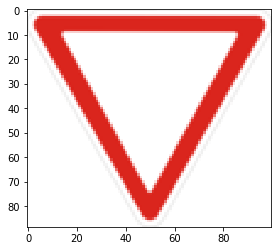

In [27]:
image = load('mytrafic.jpg')
val=model.predict_classes(image)[0]
path='Meta/{0}.png'.format(val)
print("And in actual data this sign means")
import matplotlib.image as mpimg
img=mpimg.imread(path)
plt.imshow(img)